In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
% matplotlib inline

2022-12-14 14:32:09.657867: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-14 14:32:09.834186: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-14 14:32:09.834219: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-14 14:32:11.076315: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

In [2]:
from tensorflow.keras.applications.xception import Xception

In [3]:
tf.__version__

'2.9.1'

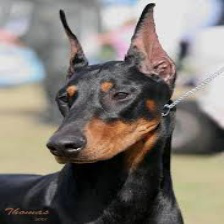

In [4]:
path = './archive/'
name = 'train/Doberman/001.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [5]:
train_path = path + 'train'
test_path = path + 'test'
valid_path = path + 'valid'

In [6]:
train_path

'./archive/train'

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
image_generator = ImageDataGenerator(rescale=1 / 255, validation_split=0.2)

In [9]:
train_dataset = image_generator.flow_from_directory(batch_size=32,
                                                    directory=train_path,
                                                    shuffle=True,
                                                    target_size=(224, 224),
                                                    subset="training",
                                                    class_mode='categorical')

Found 6390 images belonging to 70 classes.


In [10]:
validation_dataset = image_generator.flow_from_directory(batch_size=32,
                                                         directory=valid_path,
                                                         shuffle=True,
                                                         target_size=(224, 224),
                                                         subset="validation",
                                                         class_mode='categorical')

Found 140 images belonging to 70 classes.


In [11]:
IMG_SHAPE = (224, 224, 3)
base_model = Xception(input_shape=IMG_SHAPE,
                      include_top=False,
                      weights='imagenet')

2022-12-14 10:50:29.215634: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-14 10:50:29.312078: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-14 10:50:29.312883: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-14 10:50:29.315136: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

In [12]:
base_model.trainable = False

In [13]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(70, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 dropout (Dropout)           (None, 7, 7, 2048)        0         
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 70)                143430    
                                                                 
Total params: 21,004,910
Trainable params: 143,430
Non-trainable params: 20,861,480
_________________________________________________________________


In [14]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
model.save_weights('model_v1.h5', save_format='h5')

In [16]:
chechpoint = keras.callbacks.ModelCheckpoint(
    'model_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [17]:
history = model.fit(train_dataset, epochs=10, validation_data=validation_dataset, callbacks=[chechpoint])

Epoch 1/10


2022-12-14 10:50:44.013193: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-12-14 10:50:46.240324: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-12-14 10:50:46.241412: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-12-14 10:50:46.241454: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-12-14 10:50:46.242459: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-12-14 10:50:46.242565: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


200/200 [==============================] - 35s 132ms/step - loss: 2.8846 - accuracy: 0.5285 - val_loss: 1.7552 - val_accuracy: 0.8071
Epoch 2/10
200/200 [==============================] - 24s 122ms/step - loss: 1.1110 - accuracy: 0.8836 - val_loss: 0.8469 - val_accuracy: 0.8929
Epoch 3/10
200/200 [==============================] - 24s 121ms/step - loss: 0.6005 - accuracy: 0.9111 - val_loss: 0.6148 - val_accuracy: 0.8857
Epoch 4/10
200/200 [==============================] - 25s 124ms/step - loss: 0.4325 - accuracy: 0.9200 - val_loss: 0.5241 - val_accuracy: 0.9071
Epoch 5/10
200/200 [==============================] - 25s 125ms/step - loss: 0.3526 - accuracy: 0.9235 - val_loss: 0.4831 - val_accuracy: 0.9143
Epoch 6/10
200/200 [==============================] - 25s 126ms/step - loss: 0.3056 - accuracy: 0.9304 - val_loss: 0.4604 - val_accuracy: 0.9214
Epoch 7/10
200/200 [==============================] - 25s 127ms/step - loss: 0.2732 - accuracy: 0.9330 - val_loss: 0.4442 - val_accuracy: 0.9

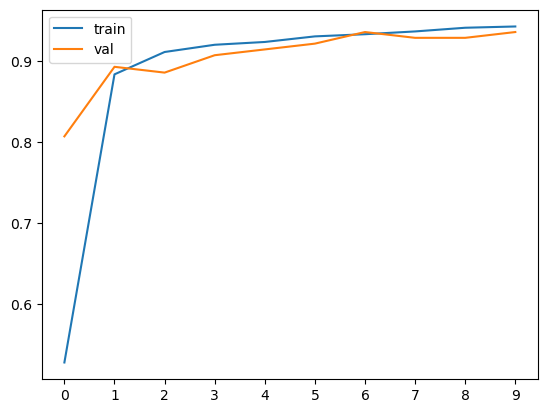

In [18]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

Downlowd weight train model

In [19]:
import tensorflow as tf
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pickle

In [13]:
model = tf.keras.models.load_model('model_v1_07_0.936.h5')

In [14]:
path = './archive/'
valid_path = path + 'valid'

In [15]:
image_generator = ImageDataGenerator(rescale=1 / 255, validation_split=0.2)
valid_dataset = image_generator.flow_from_directory(batch_size=32,
                                                    directory=valid_path,
                                                    shuffle=True,
                                                    target_size=(224, 224),
                                                    subset="training",
                                                    class_mode='categorical')

Found 560 images belonging to 70 classes.


In [16]:
classes = valid_dataset.class_indices

In [17]:
classes = list(classes.keys())


In [20]:
with open("classes", "wb") as fp:   #Pickling
    pickle.dump(classes, fp)

In [58]:
classes[34]

'Doberman'

In [18]:
classes

['Afghan',
 'African Wild Dog',
 'Airedale',
 'American  Spaniel',
 'American Hairless',
 'Basenji',
 'Basset',
 'Beagle',
 'Bearded Collie',
 'Bermaise',
 'Bichon Frise',
 'Blenheim',
 'Bloodhound',
 'Bluetick',
 'Border Collie',
 'Borzoi',
 'Boston Terrier',
 'Boxer',
 'Bull Mastiff',
 'Bull Terrier',
 'Bulldog',
 'Cairn',
 'Chihuahua',
 'Chinese Crested',
 'Chow',
 'Clumber',
 'Cockapoo',
 'Cocker',
 'Collie',
 'Corgi',
 'Coyote',
 'Dalmation',
 'Dhole',
 'Dingo',
 'Doberman',
 'Elk Hound',
 'French Bulldog',
 'German Sheperd',
 'Golden Retriever',
 'Great Dane',
 'Great Perenees',
 'Greyhound',
 'Groenendael',
 'Irish Spaniel',
 'Irish Wolfhound',
 'Japanese Spaniel',
 'Komondor',
 'Labradoodle',
 'Labrador',
 'Lhasa',
 'Malinois',
 'Maltese',
 'Mex Hairless',
 'Newfoundland',
 'Pekinese',
 'Pit Bull',
 'Pomeranian',
 'Poodle',
 'Pug',
 'Rhodesian',
 'Rottweiler',
 'Saint Bernard',
 'Schnauzer',
 'Scotch Terrier',
 'Shar_Pei',
 'Shiba Inu',
 'Shih-Tzu',
 'Siberian Husky',
 'Vizsla'

In [12]:
img = load_img(valid_path + '/Doberman/01.jpg', target_size=(224, 224))

x = np.array(img)
X = np.array([x])

X = preprocess_input(X)

In [14]:
preds = model.predict(X)

1/1 [==============================] - 1s 1s/step


In [74]:
preds

array([[3.26452398e-04, 1.54071575e-04, 6.81962876e-04, 1.48676068e-03,
        4.05466650e-04, 2.87278119e-04, 7.64562283e-05, 2.57135544e-04,
        8.50545985e-05, 4.94897540e-05, 1.58495488e-04, 1.91994113e-05,
        2.68184114e-04, 1.16508093e-03, 6.50917209e-05, 2.88537849e-04,
        1.38270698e-04, 1.42297358e-04, 1.15492483e-04, 4.00304882e-04,
        1.64067475e-04, 1.41274984e-04, 8.49087228e-05, 2.23600597e-04,
        4.72032407e-05, 8.55934413e-05, 1.17414871e-04, 1.32862842e-04,
        1.19000644e-04, 4.87633006e-05, 1.11601999e-04, 3.91942624e-04,
        1.86725185e-04, 2.01564078e-04, 9.50142205e-01, 8.08477271e-05,
        5.93310942e-05, 9.84369195e-04, 9.55820506e-05, 1.65997574e-03,
        4.57625974e-05, 7.00594566e-04, 1.26490457e-04, 1.17975185e-04,
        3.21534870e-04, 8.66322953e-05, 1.83436423e-04, 1.03560364e-04,
        2.35696789e-03, 1.36824761e-04, 5.48545853e-04, 1.49213709e-04,
        6.52492396e-04, 9.82318670e-05, 1.04488427e-04, 6.009302

In [79]:
ind = np.argpartition(preds[0], -2)[-2:]
ind

array([60, 34])

In [95]:
preds[0][ind]

array([0.02336212, 0.9501422 ], dtype=float32)

In [21]:
for i in ind:
    if np.diff(preds[0][ind]) < 0.3: # if half - breed
        print(classes[i], preds[0][i])
    else:
        print(classes[np.argmax(preds[0])], preds[0][ind])
        break

NameError: name 'ind' is not defined

# Convert Keras to TF-Lite

In [11]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

tflite_model = converter.convert()

with open('model_0.936.tflite', 'wb') as f_out:
    f_out.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpg0untlh2/assets


INFO:tensorflow:Assets written to: /tmp/tmpg0untlh2/assets
2022-12-15 15:52:39.092704: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-12-15 15:52:39.092760: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2022-12-15 15:52:39.095696: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmpg0untlh2
2022-12-15 15:52:39.122918: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2022-12-15 15:52:39.122962: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /tmp/tmpg0untlh2
2022-12-15 15:52:39.208030: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:357] MLIR V1 optimization pass is not enabled
2022-12-15 15:52:39.238354: I tensorflow/cc/saved_model/loader.cc:229] Restoring SavedModel bundle.
2022-12-15 15:52:40.067835: I tensorflow/cc/saved_model/loader.cc:213] Running initializatio